# PHP - Pulsating Heat Pipe [DI-Water, 40FR]
Data collection and preparation for data analysis and machine learning 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
sns.set()
import glob
from ipynb.fs.full.mdf import DataChop, DataArrange, DataETL

### Menualy Defined Functions (MDF)
[more details: help(function_name)]
1. DataETL
2. DataChop
3. DataArrange

## Data loading

In [18]:
# loading and cleaning data
df = DataETL('data/di_water_exp/40_FR/')

## EDA

In [19]:
df.describe()

,Time (Min),Tc - AVG (oC),Te - AVG (oC),Pressure (mm of Hg),Te - Tc (oC),Resistance (oC/W)
count,345.000000,345.000000,345.000000,345.000000,345.000000,346.000000
mean,28.713043,58.629710,76.879227,582.893217,18.249517,0.228194
std,16.971812,15.185949,17.664852,184.364072,5.622535,0.070236
min,0.000000,25.750000,27.666667,210.000000,0.000000,0.000000
25%,14.000000,45.750000,71.000000,435.000000,15.550000,0.194531
50%,28.500000,66.000000,84.400000,635.000000,18.850000,0.236250
75%,43.000000,71.000000,89.600000,710.000000,21.500000,0.268750
max,60.500000,79.000000,95.333333,1060.000000,30.583333,0.382292


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time (Min)           345 non-null    float64
 1   Tc - AVG (oC)        345 non-null    float64
 2   Te - AVG (oC)        345 non-null    float64
 3   Pressure (mm of Hg)  345 non-null    float64
 4   Te - Tc (oC)         345 non-null    float64
 5   Q (W)                346 non-null    object 
 6   Resistance (oC/W)    346 non-null    float64
dtypes: float64(6), object(1)
memory usage: 19.0+ KB


<Axes: title={'center': 'Tc & Te'}, xlabel='Data', ylabel='Temperature[C]'>

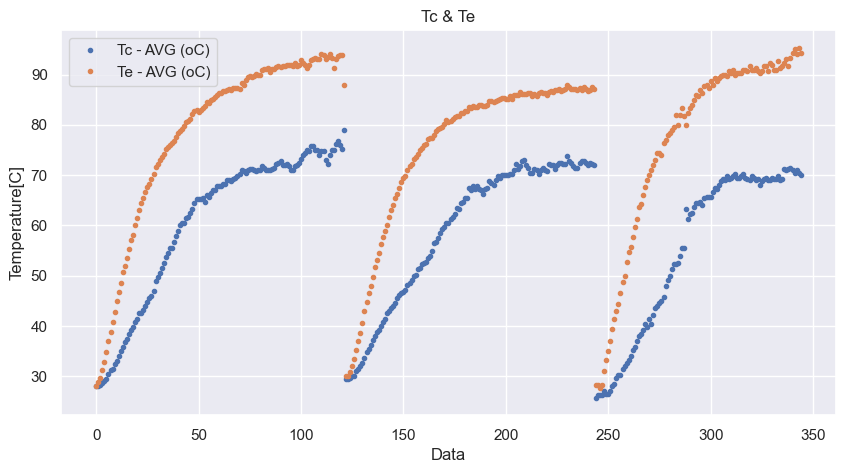

In [21]:
df[['Tc - AVG (oC)', 'Te - AVG (oC)']].plot(style='.',
                                                      figsize=(10,5),
                                                      title = 'Tc & Te',
                                                      xlabel='Data',
                                                      ylabel='Temperature[C]')

<Axes: title={'center': 'Thermal Performance'}, xlabel='Data', ylabel='Thermal Resistance [C/W]'>

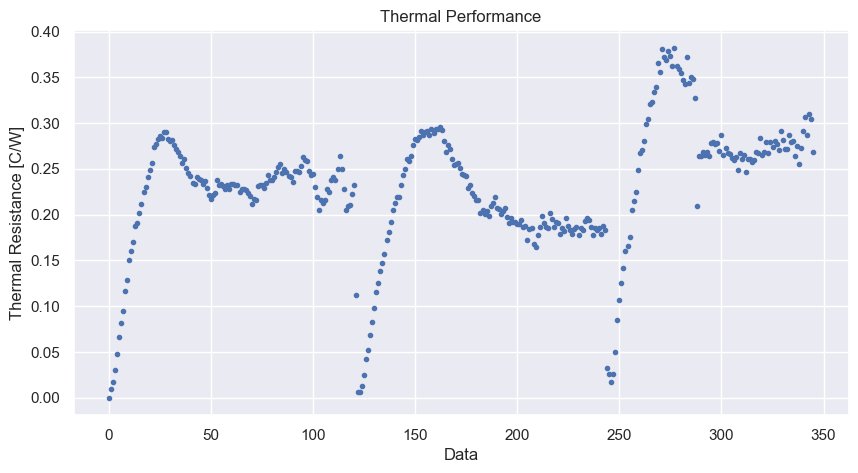

In [22]:
df['Resistance (oC/W)'].plot(style='.',
                             figsize=(10,5),
                             title =  'Thermal Performance',
                             xlabel='Data',
                             ylabel='Thermal Resistance [C/W]')

<Axes: title={'center': 'Pressure'}, xlabel='Data', ylabel='Pressure [mmHg]'>

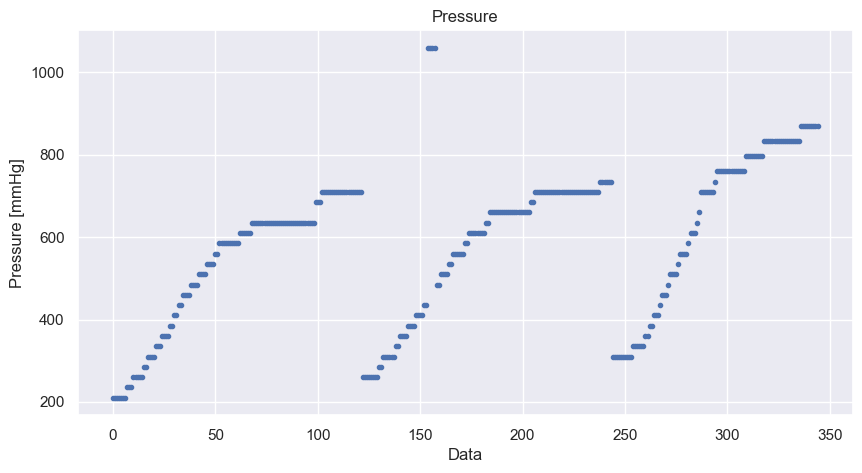

In [23]:
df['Pressure (mm of Hg)'].plot(style='.',
                                 figsize=(10,5),
                                 title='Pressure',
                                 xlabel='Data',
                                 ylabel='Pressure [mmHg]')

<Axes: title={'center': 'Temperature Difference'}, xlabel='Data', ylabel='Temperature Difference[C]'>

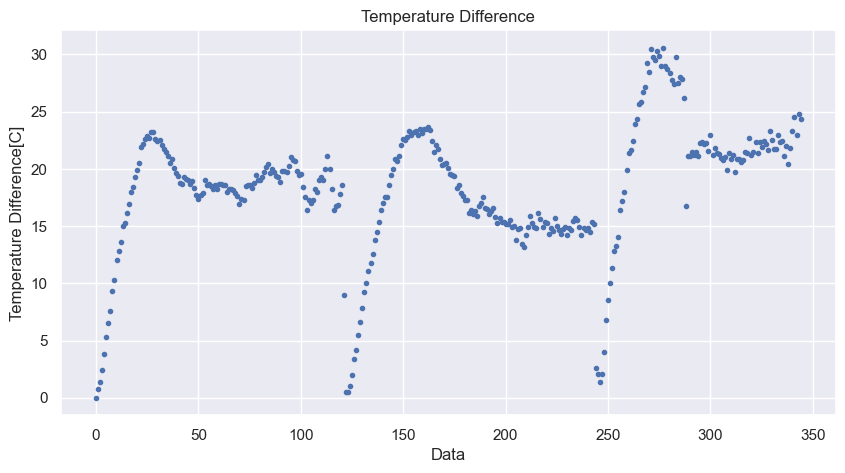

In [24]:
df['Te - Tc (oC)'].plot(style='.',
                        figsize=(10,5),
                        title=('Temperature Difference'),
                        xlabel='Data',
                        ylabel='Temperature Difference[C]')

## Data Grouping and Arranging

In [25]:
df_mean, df_std = DataArrange(df,'data/di_water_exp/40_FR/')

/Users/nirmal/Documents/data_science/PulseHeatPipe/mdf.ipynb:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  },


In [26]:
df_mean

,Te - AVG (oC),Time (Min),Tc - AVG (oC),Pressure (mm of Hg),Te - Tc (oC),Resistance (oC/W)
0,27.666667,1.000000,26.250000,310.000000,1.416667,0.017708
1,28.000000,0.000000,28.000000,210.000000,0.000000,0.000000
2,28.333333,0.666667,26.083333,310.000000,2.250000,0.028125
3,28.800000,0.500000,28.000000,210.000000,0.800000,0.010000
4,29.600000,1.000000,28.250000,210.000000,1.350000,0.016875
...,...,...,...,...,...,...
183,93.800000,58.333333,75.333333,710.000000,18.466667,0.230833
184,94.000000,53.666667,73.250000,763.446667,20.750000,0.259375
185,94.333333,49.000000,70.500000,870.340000,23.833333,0.297917
186,95.000000,48.500000,70.500000,870.340000,24.500000,0.306250


In [27]:
df_std

,Te - AVG (oC),Time (Min),Tc - AVG (oC),Pressure (mm of Hg),Te - Tc (oC),Resistance (oC/W)
2,28.333333,0.763763,0.288675,0.000000,0.288675,0.003608
5,30.000000,0.353553,0.000000,0.000000,0.000000,0.000000
16,37.000000,0.288675,2.362908,50.000000,2.362908,0.029536
24,43.000000,0.353553,2.828427,35.355339,2.828427,0.035355
53,60.000000,0.353553,1.237437,35.355339,1.237437,0.015468
...,...,...,...,...,...,...
178,93.000000,4.034229,1.947220,65.458531,1.947220,0.024340
179,93.200000,2.828427,0.000000,0.000000,0.000000,0.000000
183,93.800000,2.466441,0.629153,0.000000,0.629153,0.007864
184,94.000000,4.163332,1.984313,92.572342,1.984313,0.024804


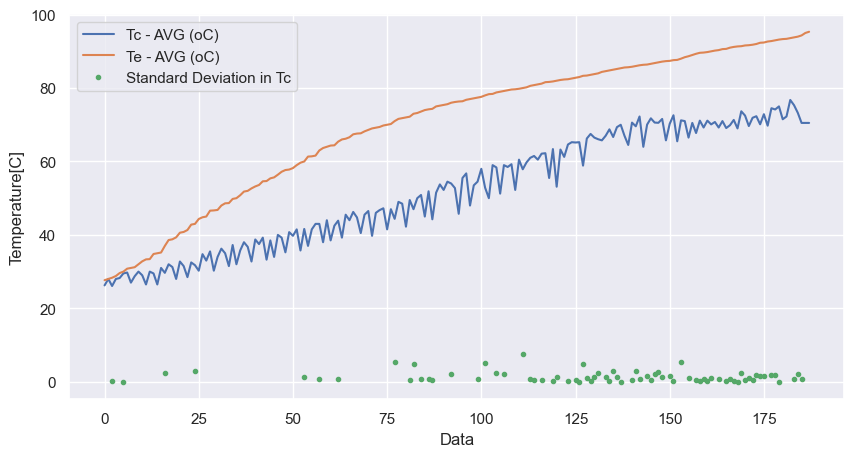

In [28]:
df_mean[['Tc - AVG (oC)', 'Te - AVG (oC)']].plot(style='-',
        figsize=(10,5))
df_std['Tc - AVG (oC)'].plot(style='.', xlabel='Data', ylabel='Temperature[C]', label='Standard Deviation in Tc')
plt.legend()

## Expanded Uncertainty [EU] calculation and plotting

PHP - Tc and Te temperature

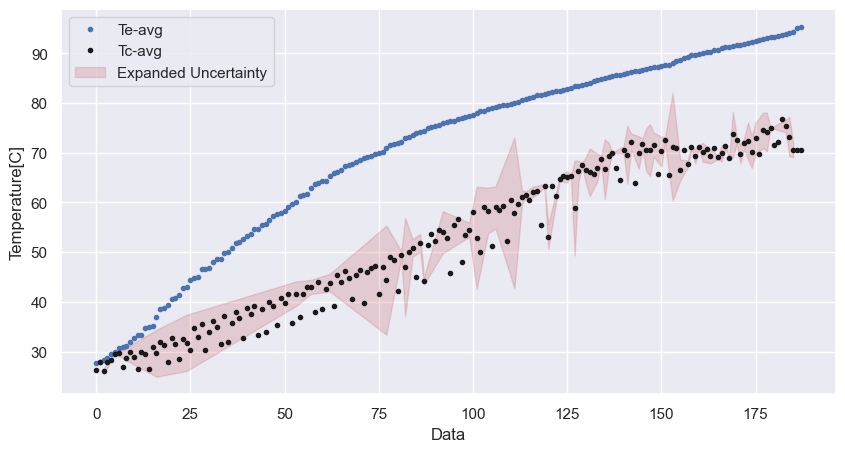

In [29]:
# plot of Tc and Te average tempratures with calculated expanded uncertainty with 95% confidence interval
plt.figure(figsize=(10,5));
plt.plot(df_mean['Te - AVG (oC)'].index, df_mean['Te - AVG (oC)'], '.b', label='Te-avg')
plt.plot(df_mean['Tc - AVG (oC)'].index, df_mean['Tc - AVG (oC)'], '.k', label='Tc-avg' )
idx = df_std.index
df_mean_idx = df_mean.loc[idx]
plt.fill_between(df_std['Tc - AVG (oC)'].index, df_mean_idx['Tc - AVG (oC)'] - 2* df_std['Tc - AVG (oC)'], df_mean_idx['Tc - AVG (oC)'] + 2* df_std['Tc - AVG (oC)'],color='r', alpha=0.2, label='Expanded Uncertainty')
plt.xlabel('Data')
plt.ylabel('Temperature[C]')
plt.legend()


PHP - Pressure

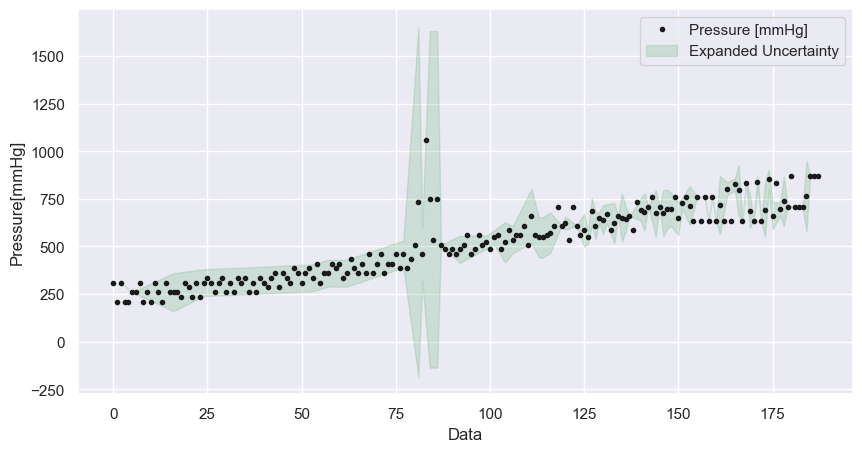

In [30]:
# pressure graph with EU
plt.figure(figsize=(10,5));
plt.plot(df_mean['Pressure (mm of Hg)'].index, df_mean['Pressure (mm of Hg)'], '.k', label='Pressure [mmHg]' )
idx = df_std.index
df_mean_idx = df_mean.loc[idx]
plt.fill_between(df_std['Pressure (mm of Hg)'].index, df_mean_idx['Pressure (mm of Hg)'] - 2* df_std['Pressure (mm of Hg)'], df_mean_idx['Pressure (mm of Hg)'] + 2* df_std['Pressure (mm of Hg)'],color='g', alpha=0.2, label='Expanded Uncertainty')
plt.xlabel('Data')
plt.ylabel('Pressure[mmHg]')
plt.legend()

PHP - Thermal Resistance

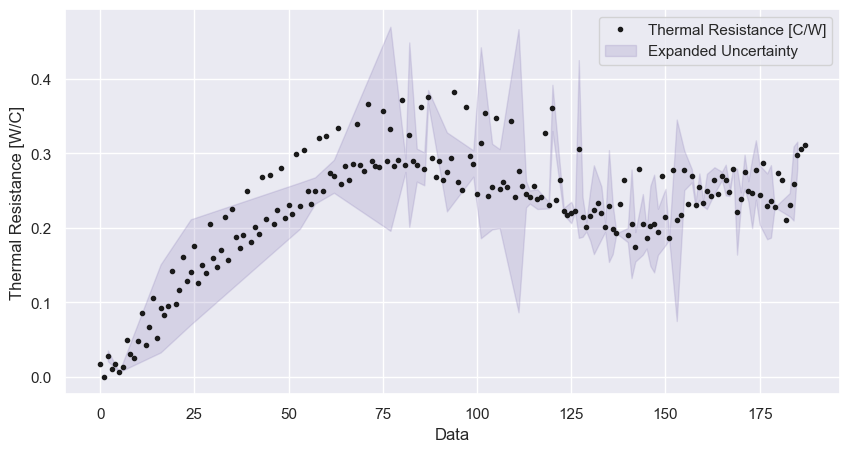

In [31]:
# thermal resistance graph with EU
plt.figure(figsize=(10,5));
plt.plot(df_mean['Resistance (oC/W)'].index, df_mean['Resistance (oC/W)'], '.k', label='Thermal Resistance [C/W]' )
idx = df_std.index
df_mean_idx = df_mean.loc[idx]
plt.fill_between(df_std['Resistance (oC/W)'].index, df_mean_idx['Resistance (oC/W)'] - 2* df_std['Resistance (oC/W)'], df_mean_idx['Resistance (oC/W)'] + 2* df_std['Resistance (oC/W)'],color='m', alpha=0.2, label='Expanded Uncertainty')
plt.xlabel('Data')
plt.ylabel('Thermal Resistance [W/C]')
plt.legend()

PHP - Temperature vs Pressure

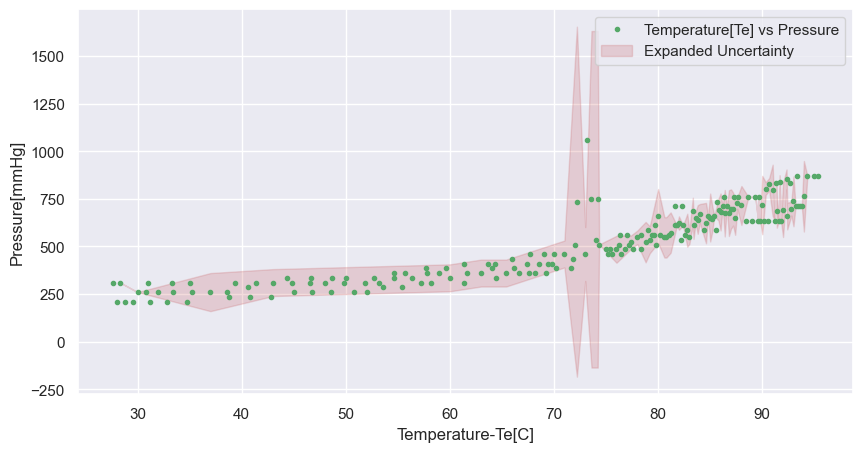

In [32]:
plt.figure(figsize=(10,5));
plt.plot(df_mean['Te - AVG (oC)'], df_mean['Pressure (mm of Hg)'],'.g', label='Temperature[Te] vs Pressure')
plt.fill_between(df_mean_idx['Te - AVG (oC)'],df_mean_idx['Pressure (mm of Hg)'] - 2* df_std['Pressure (mm of Hg)'], df_mean_idx['Pressure (mm of Hg)'] + 2* df_std['Pressure (mm of Hg)'], color='r', alpha=0.2, label='Expanded Uncertainty')
plt.xlabel('Temperature-Te[C]')
plt.ylabel('Pressure[mmHg]')
plt.legend()

## Calculation of average EU of PHP measurement

Calculation of average uncertainty in the Tc-temperature measurement

In [33]:
# Tc - temperature average uncertainty in measurement
Tc_uncertainy = ((df_std['Tc - AVG (oC)'] / df_mean['Tc - AVG (oC)'])*100).dropna()
Tc_uncertainy_mean = Tc_uncertainy.mean()
print("Average Uncertainty for the Tc measurement {} [%]".format(round(Tc_uncertainy_mean,2)))

Average Uncertainty for the Tc measurement 2.45 [%]


Calculation of average uncertainty in the thermal resistance measurement

In [34]:
# Thermal resistance avg uncertainty calculation
TR_uncertainty = ((df_std['Resistance (oC/W)']/df_mean['Resistance (oC/W)'])*100).dropna()
TR_uncertainty_mean = TR_uncertainty.mean()
print("Average uncertainty for the Thermal Resistance measurement {} [%]".format(round(TR_uncertainty_mean,2)))

Average uncertainty for the Thermal Resistance measurement 7.65 [%]


## Calculation of average thermal resistance of PHP

In [35]:
## Calculation of average thermal resistance of PHP
TR_avg = df_mean['Resistance (oC/W)'].mean()
print("Average thermal resistance in PHP is {} [C/W]".format(round(TR_avg,4)))

Average thermal resistance in PHP is 0.2286 [C/W]
